In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("WorldHappinessReport.csv")

Problem - 1: Getting Started with Data Exploration
1. Data Exploration and Understanding:

In [ ]:
# 1. Display the first 10 rows
print("Dataset Overview:")
print(df.head(10))

Dataset Overview:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0

In [ ]:
#2. Identify the number of rows and columns in the dataset.
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}, Number of Columns: {num_columns}")

Number of Rows: 143, Number of Columns: 9


In [ ]:
# 3. List all columns and their data types
print("Information of Column:")
print(df.dtypes)

Information of Column:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
#1.Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
sd_score = df['score'].std()
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {sd_score}")

Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
#2. Identify the country with the highest and lowest happiness scores.
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"Highest Happiness Score Country: {max_score_country}, Lowest Happiness Score Country: {min_score_country}")

Highest Happiness Score Country: Finland, Lowest Happiness Score Country: Afghanistan


In [ ]:
#1.Check if there are any missing values in the dataset. If so, display the total count for each colum
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filtering and Sorting
filtered_df = df[df['score'] > 7.5]
filtered_sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Filtered and Sorted Data:")
print(filtered_sorted_df)

Filtered and Sorted Data:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
# Adding New Columns
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("Happiness Categories Added:")
print(df[['Country name', 'score', 'Happiness Category']].head())

Happiness Categories Added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


 2. Data Visualizations:

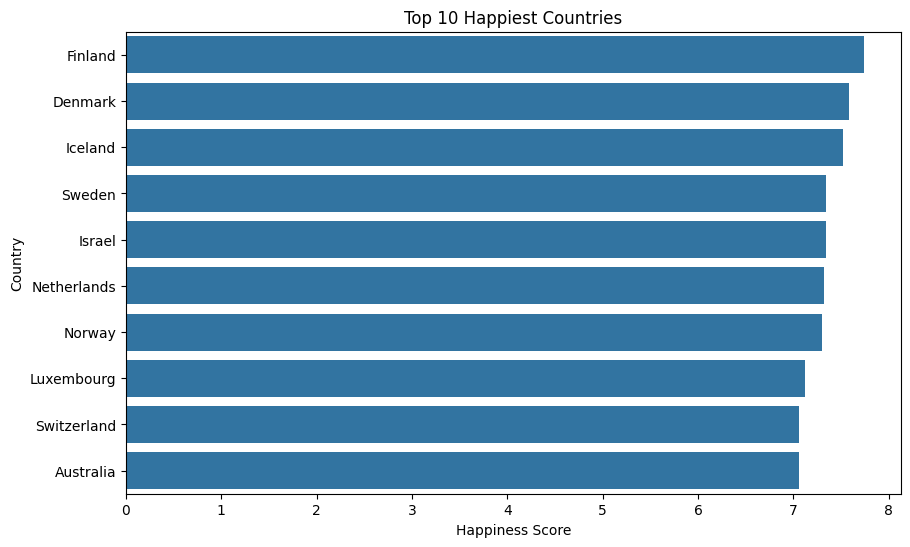

In [ ]:
# Bar Plot - Top 10 Happiest Countries
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name')
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

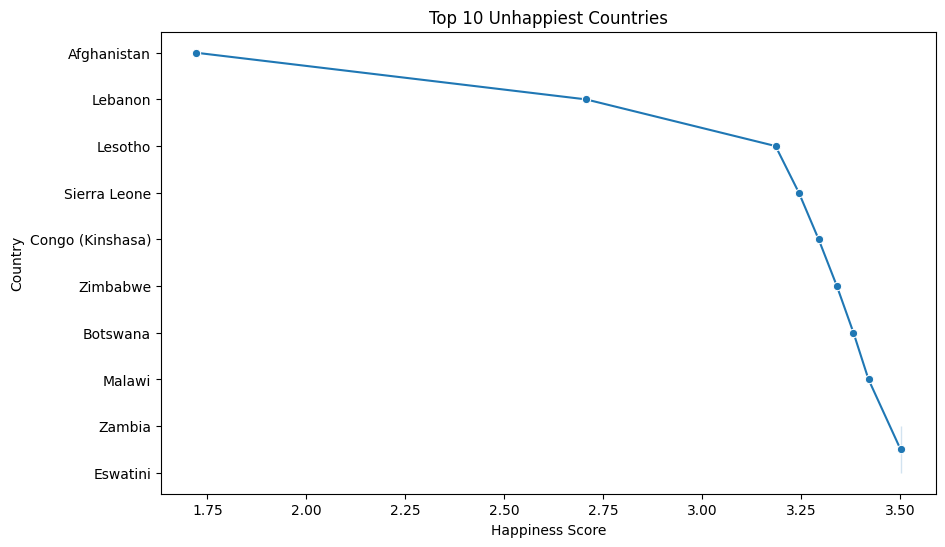

In [ ]:
# Line Plot - Top 10 Unhappiest Countries
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_unhappiest, x='score', y='Country name', marker='o', linestyle='-')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

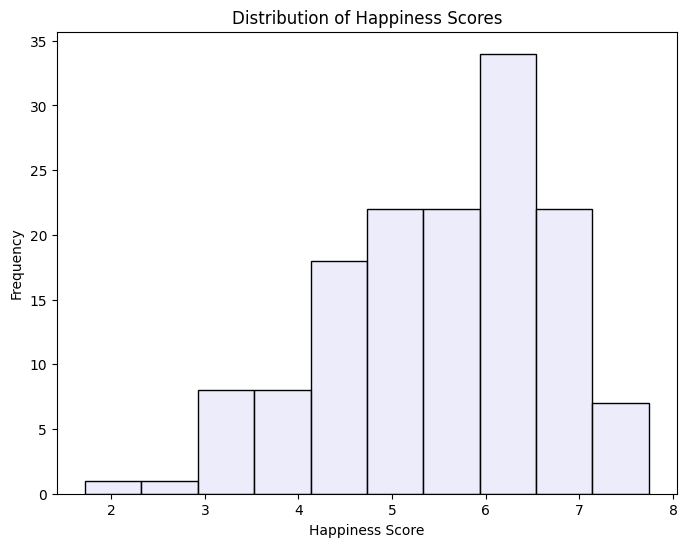

In [ ]:
# Histogram - Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], color = "lavender")
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

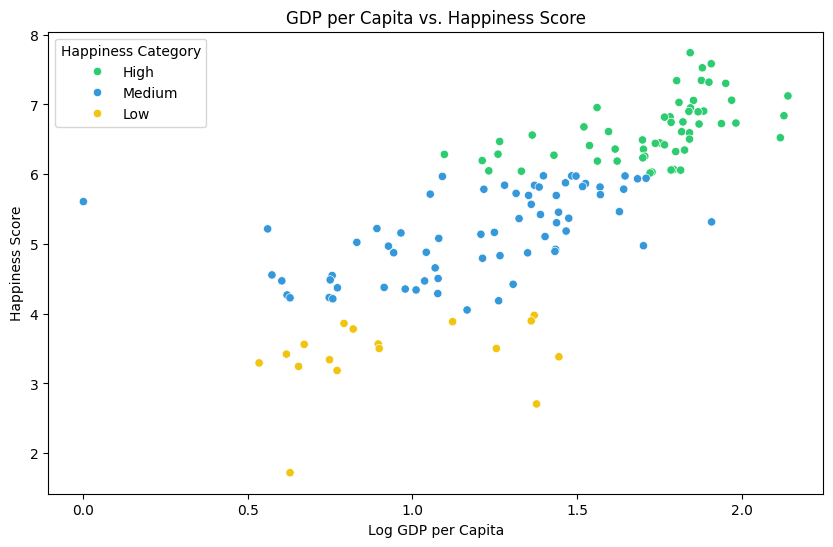

In [ ]:
# Scatter Plot - GDP vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category', palette=['#2ecc71', '#3498db', '#f1c40f'])
plt.title("GDP per Capita vs. Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Happiness Category")
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

---



In [ ]:
#1. Define the countries in South Asia with a list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)

Task - 2 - Composite Score Ranking:

In [ ]:
# Load the South Asia dataset
south_asia_df = pd.read_csv("South_Asia_Happiness.csv")

# 1.Calculate the Composite Score
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df['Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])

In [ ]:
#2. Rank the countries based on the Composite Score
south_asia_df_ranked = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("South Asia Composite Score Rankings:")
print(south_asia_df[['Country name', 'Composite Score']])

South Asia Composite Score Rankings:
  Country name  Composite Score
0        Nepal           0.8159
1     Pakistan           0.7039
2        India           0.7874
3    Sri Lanka           1.0739
4   Bangladesh           0.6774
5  Afghanistan           0.3238


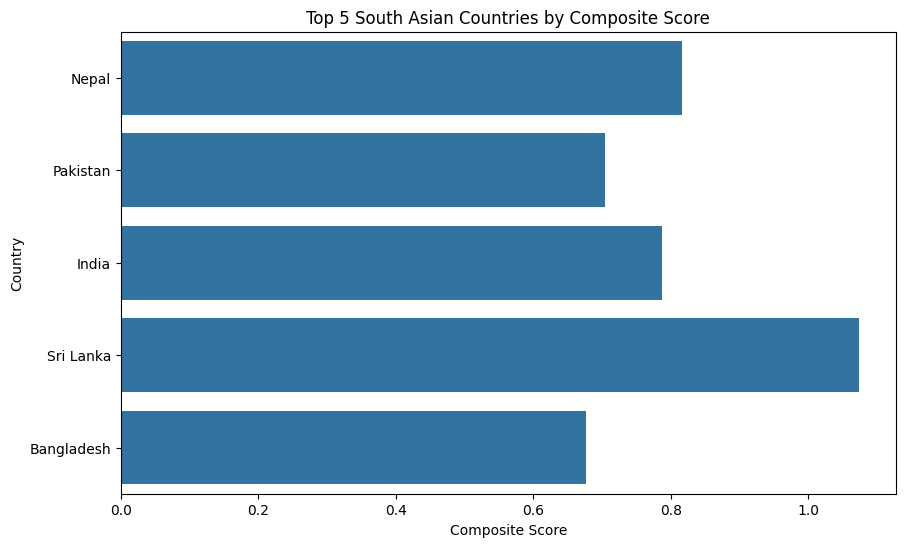

In [ ]:
#3 Visualize the top 5 countries using a horizontal bar chart
top_5_composite = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_composite, x='Composite Score', y='Country name')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

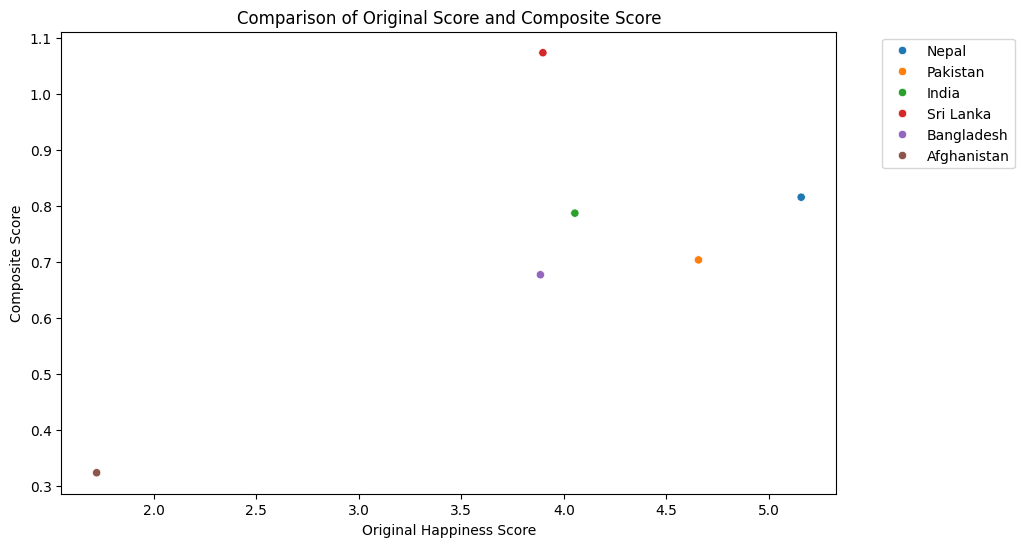

In [ ]:
#4 Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_df, hue='Country name')
plt.title("Comparison of Original Score and Composite Score")
plt.xlabel("Original Happiness Score")
plt.ylabel("Composite Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Task - 3 - Outlier Detection

In [ ]:
Q1 = south_asia_df['score'].quantile(0.25)
Q3 = south_asia_df['score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = south_asia_df[(south_asia_df['score'] < lower_bound) | (south_asia_df['score'] > upper_bound)]
print("Outliers in South Asia:")
print(outliers[['Country name', 'score']])

Outliers in South Asia:
  Country name  score
5  Afghanistan  1.721


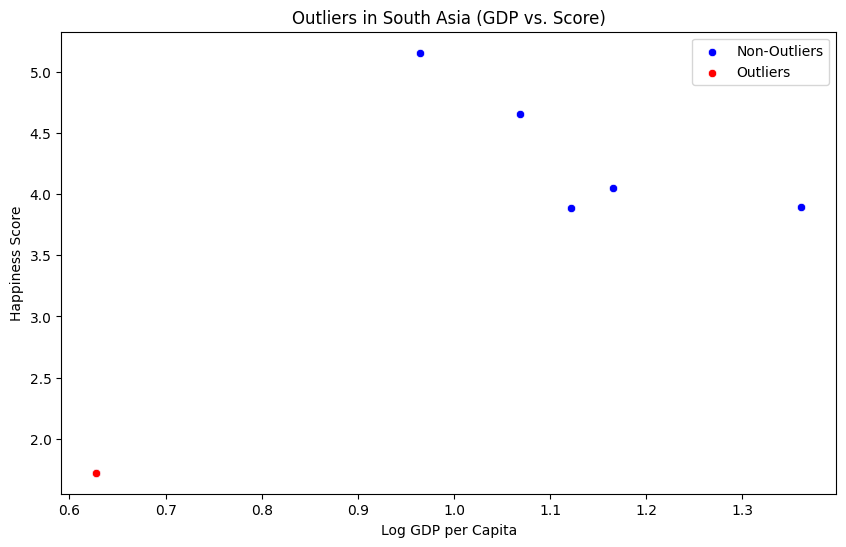

In [ ]:
# Scatter Plot with Outliers Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', color='blue', label='Non-Outliers')
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title("Outliers in South Asia (GDP vs. Score)")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

Task - 4 - Exploring Trends Across Metrics:

Correlation between Freedom to make life choices and Happiness Score: 0.8005185224163315


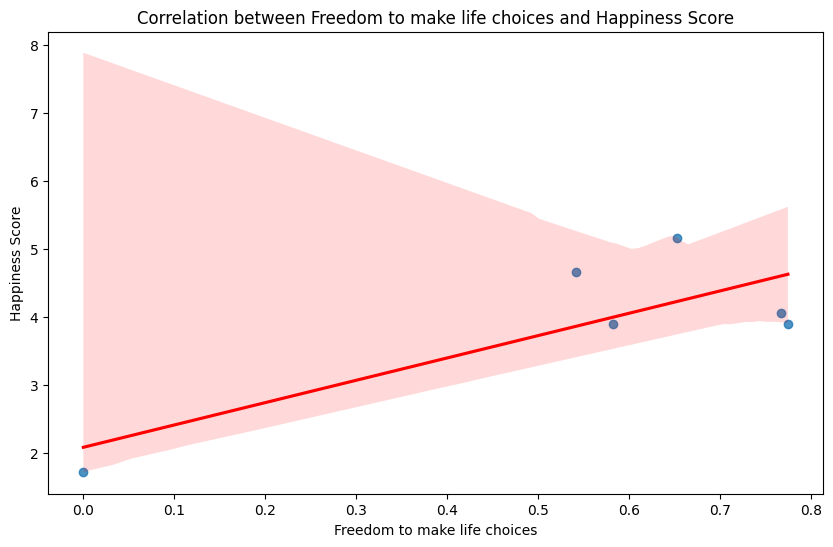

Correlation between Generosity and Happiness Score: 0.874512371253192


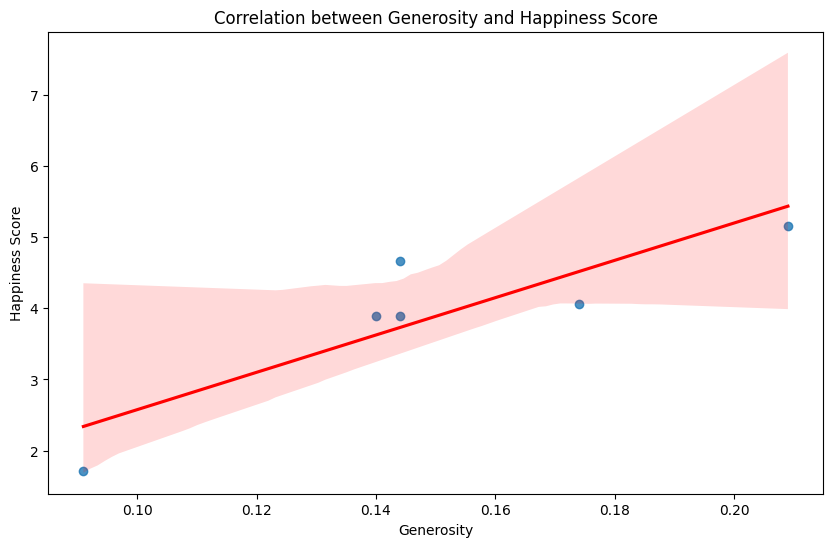

In [ ]:
# Correlation Analysis
correlation_metrics = ['Freedom to make life choices', 'Generosity']
for metric in correlation_metrics:
    correlation = south_asia_df[metric].corr(south_asia_df['score'])
    print(f"Correlation between {metric} and Happiness Score: {correlation}")
    plt.figure(figsize=(10, 6))
    sns.regplot(data=south_asia_df, x=metric, y='score', line_kws={'color': 'red'})
    plt.title(f"Correlation between {metric} and Happiness Score")
    plt.xlabel(metric)
    plt.ylabel("Happiness Score")
    plt.show()

Task - 5 - Gap Analysis

Top 3 Positive Gaps:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
Top 3 Negative Gaps:
  Country name  GDP-Score Gap
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


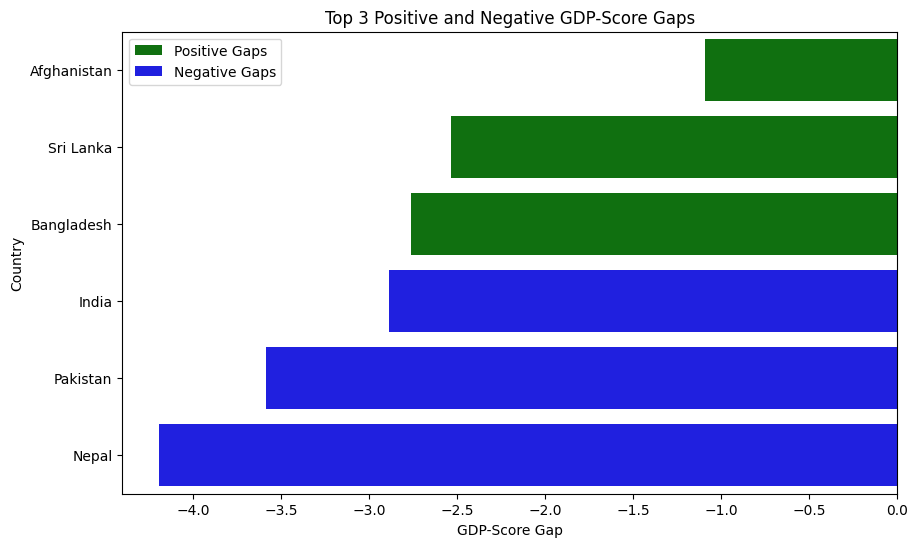

In [ ]:
# Gap Analysis
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
gap_sorted = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print("Top 3 Positive Gaps:")
print(gap_sorted.head(3)[['Country name', 'GDP-Score Gap']])
print("Top 3 Negative Gaps:")
print(gap_sorted.tail(3)[['Country name', 'GDP-Score Gap']])

# Bar Chart for Gaps
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_sorted.head(3), x='GDP-Score Gap', y='Country name', color='green', label='Positive Gaps')
sns.barplot(data=gap_sorted.tail(3), x='GDP-Score Gap', y='Country name', color='blue', label='Negative Gaps')
plt.title("Top 3 Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.legend()
plt.show()

Problem - 3 - Comparative Analysis:

In [ ]:
# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

In [ ]:
#1 Descriptive Statistics
mean_south_asia = south_asia_df['score'].mean()
sd_south_asia = south_asia_df['score'].std()
mean_middle_east = middle_east_df['score'].mean()
sd_middle_east = middle_east_df['score'].std()
print(f"South Asia - Mean: {mean_south_asia}, Standard Deviation: {sd_south_asia}")
print(f"Middle East - Mean: {mean_middle_east}, Standard Deviation: {sd_middle_east}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


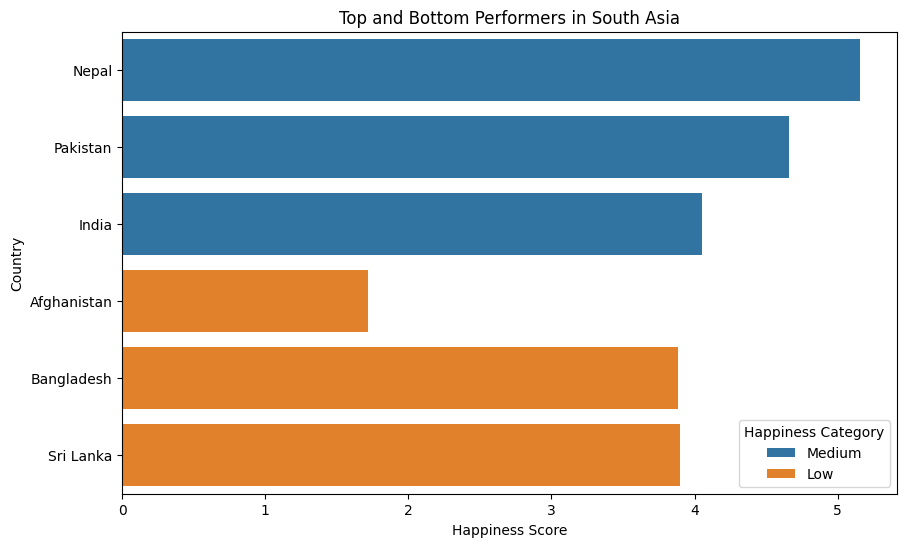

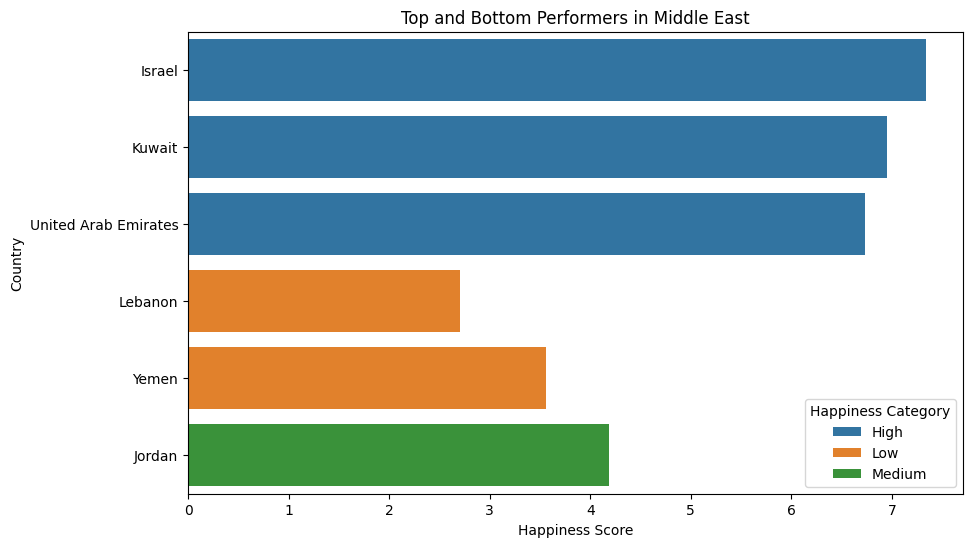

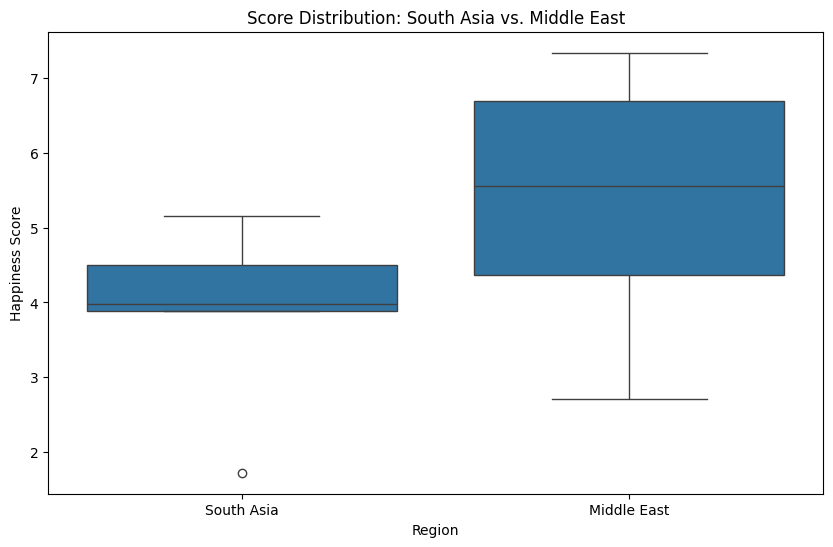

In [ ]:
# 2. Top and Bottom Performers
top_3_south_asia = south_asia_df.nlargest(3, 'score')
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')
top_3_middle_east = middle_east_df.nlargest(3, 'score')
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')

# Bar Charts Comparing Performers
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([top_3_south_asia, bottom_3_south_asia]), x='score', y='Country name', hue='Happiness Category')
plt.title("Top and Bottom Performers in South Asia")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([top_3_middle_east, bottom_3_middle_east]), x='score', y='Country name', hue='Happiness Category')
plt.title("Top and Bottom Performers in Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

# Boxplots for Score Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([south_asia_df.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')]), x='Region', y='score')
plt.title("Score Distribution: South Asia vs. Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.show()

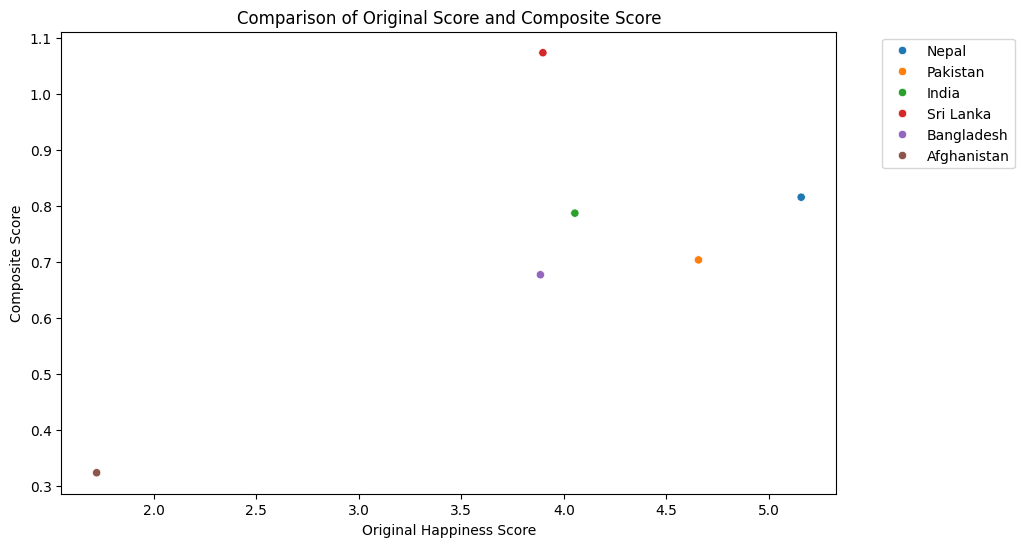

The scatter plot comparing the original happiness score and the composite score


In [ ]:
# Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_df, hue='Country name')
plt.title("Comparison of Original Score and Composite Score")
plt.xlabel("Original Happiness Score")
plt.ylabel("Composite Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("The scatter plot comparing the original happiness score and the composite score")